In [1]:
from fastai.tabular import *

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('test_data.csv',low_memory=False)

In [4]:
df.head()

,node1_id,node2_id,is_chat,f1_x,f2_x,f3_x,f4_x,f5_x,f6_x,f7_x,...,f4_y,f5_y,f6_y,f7_y,f8_y,f9_y,f10_y,f11_y,f12_y,f13_y
0,8446602,6636127,0,22,0,0,24,0,0,24,...,15,11,5,19,12,5,16,10,4,10
1,1430102,7433949,0,0,0,0,0,0,0,0,...,16,13,6,20,16,7,25,21,6,15
2,2803017,8372333,0,9,2,0,14,7,1,14,...,1,1,0,1,1,0,0,0,0,8
3,4529348,894645,0,11,11,10,11,10,9,10,...,1,1,1,1,1,1,1,1,1,15
4,5096572,4211638,0,31,31,31,31,31,31,31,...,7,1,0,9,1,0,16,1,0,7


In [5]:
dep_var=['is_chat']

In [6]:
cont_vars=['f1_x','f2_x','f3_x','f4_x','f5_x','f6_x','f7_x','f8_x','f9_x','f10_x','f11_x','f12_x','f13_x','f1_y','f2_y','f3_y','f4_y','f5_y','f6_y','f7_y','f8_y','f9_y','f10_y','f11_y','f12_y','f13_y']

In [7]:
len(cont_vars)

26

In [8]:
cat_vars = ['node1_id','node2_id']

In [9]:
df.dtypes

node1_id    int64
node2_id    int64
is_chat     int64
f1_x        int64
f2_x        int64
f3_x        int64
f4_x        int64
f5_x        int64
f6_x        int64
f7_x        int64
f8_x        int64
f9_x        int64
f10_x       int64
f11_x       int64
f12_x       int64
f13_x       int64
f1_y        int64
f2_y        int64
f3_y        int64
f4_y        int64
f5_y        int64
f6_y        int64
f7_y        int64
f8_y        int64
f9_y        int64
f10_y       int64
f11_y       int64
f12_y       int64
f13_y       int64
dtype: object

In [10]:
for col in cat_vars:
    df[col] = df[col].astype('category')

In [11]:
df.dtypes

node1_id    category
node2_id    category
is_chat        int64
f1_x           int64
f2_x           int64
f3_x           int64
f4_x           int64
f5_x           int64
f6_x           int64
f7_x           int64
f8_x           int64
f9_x           int64
f10_x          int64
f11_x          int64
f12_x          int64
f13_x          int64
f1_y           int64
f2_y           int64
f3_y           int64
f4_y           int64
f5_y           int64
f6_y           int64
f7_y           int64
f8_y           int64
f9_y           int64
f10_y          int64
f11_y          int64
f12_y          int64
f13_y          int64
dtype: object

In [12]:
valid_list=list(range(80000,len(df)))

In [13]:
len(valid_list)

20000

In [14]:
df.head()

,node1_id,node2_id,is_chat,f1_x,f2_x,f3_x,f4_x,f5_x,f6_x,f7_x,...,f4_y,f5_y,f6_y,f7_y,f8_y,f9_y,f10_y,f11_y,f12_y,f13_y
0,8446602,6636127,0,22,0,0,24,0,0,24,...,15,11,5,19,12,5,16,10,4,10
1,1430102,7433949,0,0,0,0,0,0,0,0,...,16,13,6,20,16,7,25,21,6,15
2,2803017,8372333,0,9,2,0,14,7,1,14,...,1,1,0,1,1,0,0,0,0,8
3,4529348,894645,0,11,11,10,11,10,9,10,...,1,1,1,1,1,1,1,1,1,15
4,5096572,4211638,0,31,31,31,31,31,31,31,...,7,1,0,9,1,0,16,1,0,7


In [15]:
train_df=df[0:80000]

In [16]:
path=''

In [19]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=[],)
                .split_by_idx(valid_list)
                .label_from_df(cols=dep_var)
                .databunch())

In [20]:
data.show_batch(rows=5)

node1_id,node2_id,f1_x,f2_x,f3_x,f4_x,f5_x,f6_x,f7_x,f8_x,f9_x,f10_x,f11_x,f12_x,f13_x,f1_y,f2_y,f3_y,f4_y,f5_y,f6_y,f7_y,f8_y,f9_y,f10_y,f11_y,f12_y,f13_y,target
757005,6701150,31.0000,31.0000,5.0000,31.0000,31.0000,5.0000,31.0000,30.0000,7.0000,31.0000,27.0000,5.0000,7.0000,31.0000,31.0000,6.0000,31.0000,31.0000,7.0000,31.0000,31.0000,5.0000,31.0000,31.0000,3.0000,7.0000,0
346679,1649264,6.0000,5.0000,3.0000,13.0000,12.0000,10.0000,19.0000,18.0000,16.0000,26.0000,25.0000,22.0000,8.0000,31.0000,31.0000,23.0000,31.0000,30.0000,25.0000,30.0000,29.0000,24.0000,30.0000,28.0000,22.0000,15.0000,0
1430233,5659933,31.0000,21.0000,0.0000,31.0000,22.0000,0.0000,31.0000,25.0000,0.0000,31.0000,25.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,2.0000,1.0000,3.0000,2.0000,1.0000,7.0000,0
4783457,4485719,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.0000,10.0000,9.0000,9.0000,17.0000,16.0000,16.0000,17.0000,16.0000,16.0000,17.0000,16.0000,16.0000,8.0000,0
755390,1990855,29.0000,9.0000,1.0000,30.0000,13.0000,1.0000,24.0000,9.0000,0.0000,17.0000,8.0000,0.0000,15.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,2.0000,0.0000,0.0000,7.0000,0


In [21]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy)

In [22]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(97328, 600)
    (1): Embedding(98197, 600)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(26, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=1226, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=500, out_features=2, bias=True)
  )
)

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


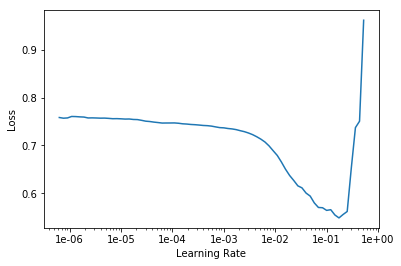

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(2,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.126494,0.125255,0.966950,01:16
1,0.077141,0.134556,0.967200,01:16


In [26]:
learn.fit_one_cycle(2,5e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.061472,0.134132,0.968350,01:17
1,0.056210,0.135329,0.968300,01:16


In [27]:
temp_result_pred,val=learn.get_preds(DatasetType.Valid)

In [28]:
val

tensor([0, 0, 0,  ..., 0, 0, 0])

In [29]:
result=val.numpy()

In [36]:
result_new = temp_result_pred.numpy()

In [37]:
result_new

array([[0.994815, 0.005185],
       [0.993288, 0.006712],
       [0.992713, 0.007287],
       [0.994063, 0.005937],
       ...,
       [0.995049, 0.004951],
       [0.776733, 0.223267],
       [0.993445, 0.006555],
       [0.99765 , 0.00235 ]], dtype=float32)

In [ ]:
count = 0
for i in result:
    if i==1:
        new_df[count,'is_chat']=1
        count= count+1
    else:
        new_df[count,'is_chat']=0
        count=count+1

In [60]:
count=0
predicted=0
for i in result_new:
    if i[1]>0.2:
        print("They Chat")
        new_df.loc[count,'is_chat']=1
        
        predicted = predicted + 1
    else:
        new_df.loc[count,'is_chat']=0
    count=count+1

They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat
They Chat


In [61]:
predicted

342

In [38]:
result_index = np.argmax(result_new,axis=1)

In [39]:
result_index

array([0, 0, 0, 0, ..., 0, 0, 0, 0])

In [40]:
count = 0
for i in result_index:
    if i==1:
        print("THEY CHAT")
        count= count+1

THEY CHAT
THEY CHAT
THEY CHAT
THEY CHAT
THEY CHAT
THEY CHAT
THEY CHAT
THEY CHAT
THEY CHAT
THEY CHAT
THEY CHAT


In [41]:
count

11

In [53]:
new_df = pd.DataFrame(columns=['is_chat'])

In [ ]:
count = 0
for i in result:
    if i==1:
        new_df[count,'is_chat']=1
        count= count+1
    else:
        new_df[count,'is_chat']=0
        count=count+1

In [57]:
new_df.to_csv('hike_1.csv',index=False)

In [56]:
new_df.head()

,is_chat
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [58]:
len(new_df)

20000

In [62]:
data.valid_ds

LabelList (20000 items)
x: TabularList
node1_id 1798714; node2_id 1925780; f1_x 19.0000; f2_x 1.0000; f3_x 0.0000; f4_x 26.0000; f5_x 1.0000; f6_x 0.0000; f7_x 30.0000; f8_x 1.0000; f9_x 0.0000; f10_x 27.0000; f11_x 1.0000; f12_x 0.0000; f13_x 15.0000; f1_y 0.0000; f2_y 0.0000; f3_y 0.0000; f4_y 0.0000; f5_y 0.0000; f6_y 0.0000; f7_y 1.0000; f8_y 1.0000; f9_y 0.0000; f10_y 8.0000; f11_y 3.0000; f12_y 0.0000; f13_y 15.0000; ,node1_id 4822781; node2_id 405079; f1_x 31.0000; f2_x 31.0000; f3_x 31.0000; f4_x 31.0000; f5_x 31.0000; f6_x 31.0000; f7_x 31.0000; f8_x 30.0000; f9_x 30.0000; f10_x 31.0000; f11_x 30.0000; f12_x 30.0000; f13_x 7.0000; f1_y 0.0000; f2_y 0.0000; f3_y 0.0000; f4_y 0.0000; f5_y 0.0000; f6_y 0.0000; f7_y 0.0000; f8_y 0.0000; f9_y 0.0000; f10_y 4.0000; f11_y 4.0000; f12_y 0.0000; f13_y 15.0000; ,node1_id 5487485; node2_id 386130; f1_x 31.0000; f2_x 31.0000; f3_x 30.0000; f4_x 31.0000; f5_x 31.0000; f6_x 31.0000; f7_x 31.0000; f8_x 31.0000; f9_x 31.0000; f10_x 31.0000; f